In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


appl_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/applications.csv")
props_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/all_properties.csv")

# matching_df = pd.read_csv("/mnt/c/Users/Amro/Desktop/DOI LISTS/Processing Batches - results/")

doi_pub_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/DOI_Publisher.csv")

ws_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/water_stability.csv")

ws24_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/labels.csv")

## Examining Property Extraction

### Number of Properties per MOF before Filtering

In [2]:
props_df = props_df.drop(["Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0"], axis = 1).merge(doi_pub_df, how='left', right_on="DOI", left_on="Reference").drop("DOI", axis=1)

props_df.head()

,MOF Name,Ref Code,Property,Value,Units,Condition,Summary,Reference,Publisher
0,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Yield,52,%,based on Cd,Cd(L2(SCN)2.Yield 52% (based on Cd).,10.1021/cg900515j,ACS
1,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Elemental Analysis Calculated for Carbon,27.28,%,Not specified,Elemental analysis calcd (%) for C10H9CdN5S4: ...,10.1021/cg900515j,ACS
2,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Elemental Analysis Found for Carbon,27.35,%,Not specified,"Found: C 27.35, H 2.19, N 15.97.",10.1021/cg900515j,ACS
3,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Elemental Analysis Calculated for Hydrogen,2.05,%,Not specified,Elemental analysis calcd (%) for C10H9CdN5S4: ...,10.1021/cg900515j,ACS
4,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Elemental Analysis Found for Hydrogen,2.19,%,Not specified,"Found: C 27.35, H 2.19, N 15.97.",10.1021/cg900515j,ACS


In [3]:
props_per_mof = props_df[["Ref Code", "Property"]].groupby("Ref Code").count()
average_PPM = props_per_mof["Property"].mean()

print(f"Average properties per CSD Entry: {average_PPM:.1f}")

Average properties per CSD Entry: 10.4


In [19]:
props_df[props_df["Property"].apply(lambda x: "selectivity" in x.lower())]

,MOF Name,Ref Code,Property,Value,Units,Condition,Summary,Reference,Publisher
646,MIL-141(Cs)<|>Fe(Ni-TCPP)Cs•(DMF),PAQTIM,n2/o2 selectivity,1,Not applicable,Calculated at 4 bar for air (gas composition 8...,The resulting N2/O2 selectivities calculated a...,10.1021/cm2025747,ACS
656,MIL-141(K)<|>Fe(Ni-TCPP)K•(DMF),PAQVEK,n2/o2 selectivity,0.87,NaN,Calculated at 4 bar for air (gas composition 8...,The resulting N2/O2 selectivities calculated a...,10.1021/cm2025747,ACS
1045,Zn6(IDC)4(OH)2(Hprz)2<|>1,WIJDAV,adsorption selectivity,Selective adsorption of water over organic sol...,NaN,Dehydrated sample immersed in various wet solv...,The dehydrated sample1can selectively adsorb w...,10.1021/ic7004908,ACS
1109,[Li2Zn2(NH2-bdc)3(bpy)]·DMF·CH3CN·3H2O<|>2-NH2,LAWFUN,selectivity factor for co2/ch4 adsorption (vol...,5.8,NaN,NaN,"""V ads [cm3(STP)·g–1] Henry constants K H (mmo...",10.1021/acs.inorgchem.6b02713,ACS
1110,[Li2Zn2(NH2-bdc)3(bpy)]·DMF·CH3CN·3H2O<|>2-NH2,LAWFUN,selectivity factor for co2/ch4 adsorption (hen...,9.3,NaN,NaN,"""V ads [cm3(STP)·g–1] Henry constants K H (mmo...",10.1021/acs.inorgchem.6b02713,ACS
...,...,...,...,...,...,...,...,...,...
149516,Cu2(TPTC-Me)<|>Cu 2 TPTC-Me,MUKQUG,c2h2/ch4 selectivity,60,NaN,298 K,Cu 2 TPTC-Me exhibits high selectivities of C2...,10.1016/j.micromeso.2015.05.036,Elsevier
149517,Cu2(TPTC-Me)<|>Cu 2 TPTC-Me,MUKQUG,c2h2/co2 selectivity,12.7,NaN,298 K,Cu 2 TPTC-Me exhibits high selectivities of C2...,10.1016/j.micromeso.2015.05.036,Elsevier
149744,ZJU-61<|>Cu2(OFDI),LOFJAT,separation selectivity (c2h2/ch4),74.4,none,room temperature,ZJU-61 can readily separate methane from gas m...,10.1016/j.micromeso.2014.01.023,Elsevier
151118,Cu2(ADDI)<|>ZJU-26,MOKVOZ,separation selectivity for c2h2/ch4,45.9,NaN,Room temperature,Moreover ZJU-26 as the highly selective micro-...,10.1016/j.micromeso.2013.07.019,Elsevier


### Properties per MOF for Each Publisher

<Axes: xlabel='Publisher'>

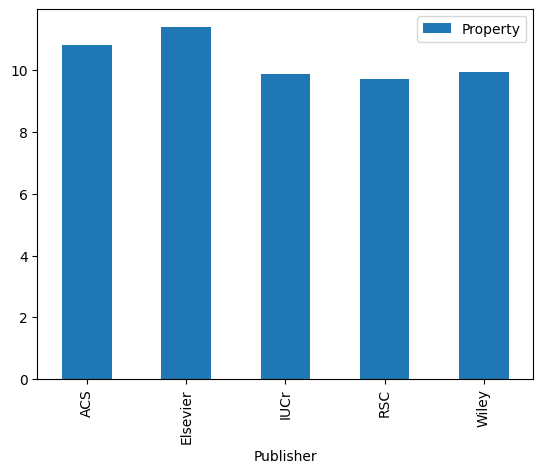

In [5]:
props_per_mof = props_df[["Ref Code", "Property", "Publisher"]].groupby(["Ref Code", "Publisher"]).count().groupby("Publisher").mean()

props_per_mof.plot(kind="bar")

### Distribution of Properties found

In [274]:
dist_props = props_df
dist_props["Property"] = dist_props["Property"].apply(lambda x: x.lower())
dist_props = props_df[["Ref Code", "Property"]].groupby("Property").count().sort_values("Ref Code", ascending=False)

dist_props.reset_index(inplace=True)

dist_props.head(50)

,Property,Ref Code
0,space group,10390
1,crystal system,9490
2,cell volume,5547
3,density,4869
4,thermal stability,3972
5,yield,3777
6,unit cell dimensions,3333
7,coordination geometry,3201
8,chemical formula,2642
9,formula weight,2408


In [16]:
uptake_df = dist_props[dist_props["Property"].apply(lambda x: "uptake" in x.lower())]

,Property,Ref Code,Embedding
61,co2 uptake,225,0.0
170,h2 uptake,90,0.0
185,co2 uptake capacity,82,0.0
194,hydrogen uptake,75,0.0
212,n2 uptake,69,0.0


In [8]:
len(dist_props)

25785

Text(0.5, 1.0, 'Distribution of extracted properties')

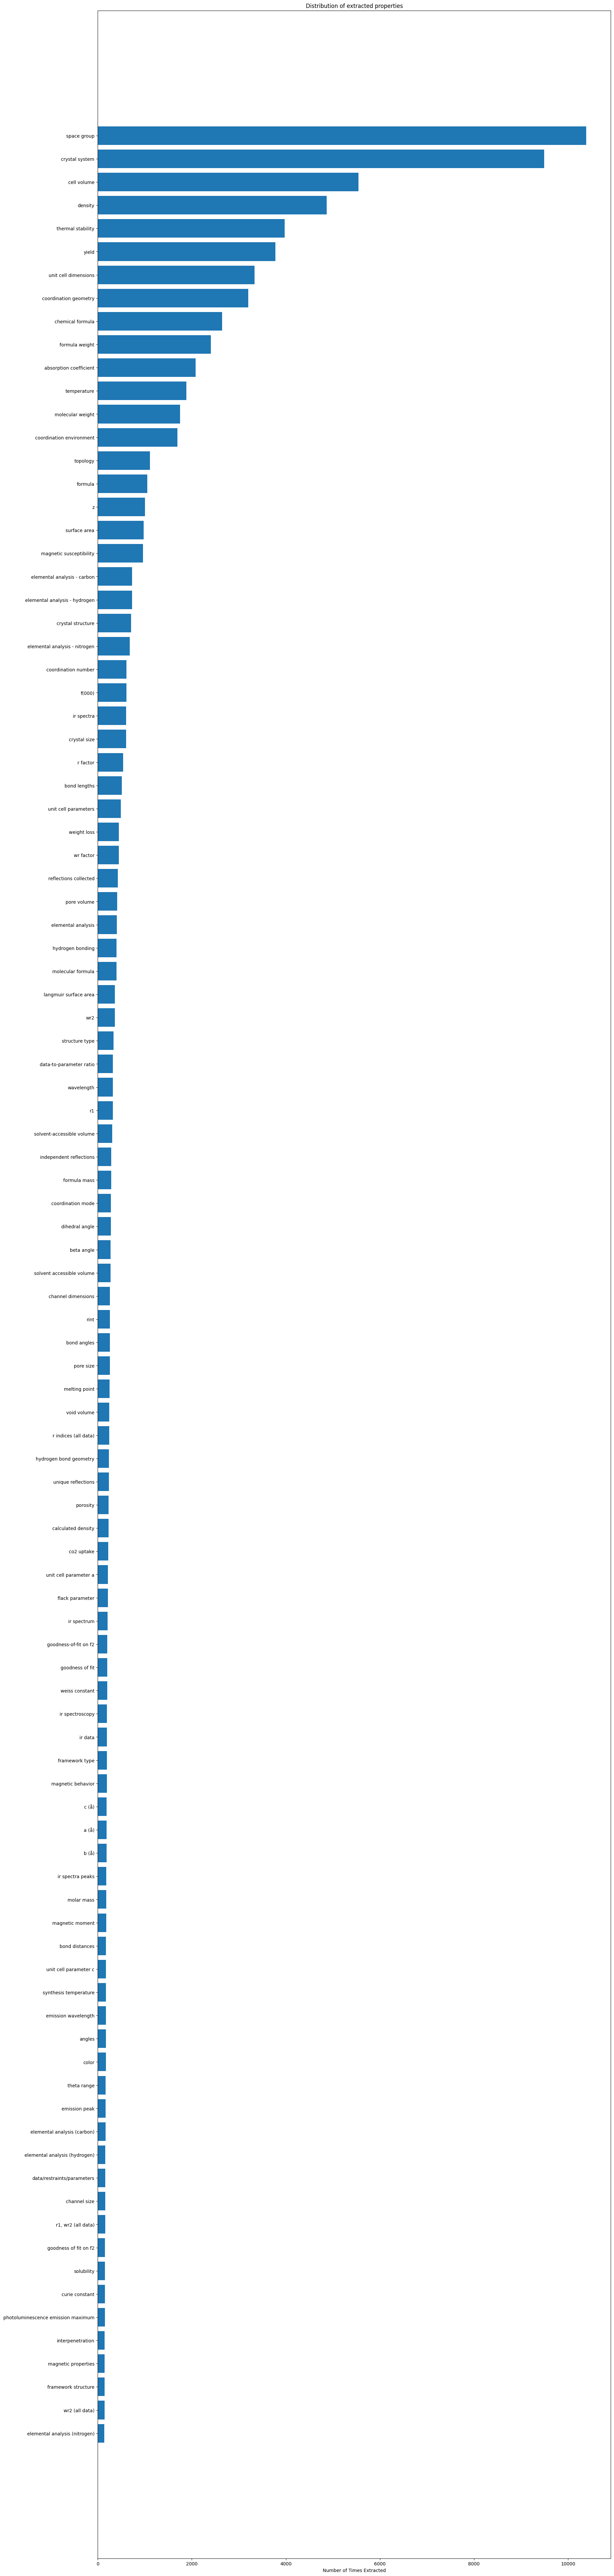

In [275]:
fig, ax = plt.subplots(figsize=(20, 100))

labels = list(dist_props["Property"].iloc[0:100])
pos = np.arange(len(labels))

values = dist_props["Ref Code"].iloc[0:100]

ax.barh(pos, values, align='center')
ax.set_yticks(pos, labels=labels)
ax.invert_yaxis()
ax.set_xlabel("Number of Times Extracted")
ax.set_title("Distribution of extracted properties")

### Attempting to Cluster using Embeddings from text-embedding-ada-002	

In [75]:
from multiprocess import Pool
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

In [31]:
dist_props["Embedding"] = pd.Series(np.zeros(len(dist_props)))

dist_props.head()

,Property,Ref Code,Embedding
0,space group,10390,0.0
1,crystal system,9490,0.0
2,cell volume,5547,0.0
3,density,4869,0.0
4,thermal stability,3972,0.0


In [32]:
len(dist_props)

25785

In [36]:
from openai import OpenAI

with open(".apikey", 'r') as f:
    client = OpenAI(api_key=f.read())

def embed_properties(start: int, end: int):
    ret_embeddings = dist_props[["Property", "Embedding"]][start:end].copy(deep=True)
    
    ret_embeddings["Embedding"] = ret_embeddings["Property"].apply(lambda x: client.embeddings.create(input=x.lower(),
                                                                            model="text-embedding-ada-002").data[0].embedding)
    

    return ret_embeddings

# with Pool(processes=8) as pool:
#     params = [(i*len(dist_props)//8, (i+1)*len(dist_props)//8) for i in range(8)]
#     results = [pool.apply_async(embed_properties, p) for p in params]

# final = pd.concat([r.get() for r in results])

dist_props["Embedding"][:2000] = dist_props["Property"][:2000].apply(lambda x: 
                                                        client.embeddings.create(input=x.lower(),
                                                                                model="text-embedding-ada-002").data[0].embedding)

/tmp/ipykernel_36864/1243535933.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dist_props["Embedding"][:2000] = dist_props["Property"][:2000].apply(lambda x:
/tmp/ipykernel_36864/1243535933.py:21: SettingWithCopyWarning: 
A value is tr

In [137]:
embeddings = np.array(list(dist_props["Embedding"][:2000]))

In [138]:
props_pca = PCA(n_components=100).fit_transform(embeddings)

props_svd = TruncatedSVD(100).fit_transform(embeddings)

In [166]:
prop_tsne = TSNE(n_components=2, perplexity=50, learning_rate='auto', init='random')
prop_tsne = prop_tsne.fit_transform(embeddings)

prop_pca_tsne = TSNE(n_components=2, perplexity=5, learning_rate='auto', init='random')
prop_pca_tsne = prop_pca_tsne.fit_transform(props_pca)

prop_svd_tsne = TSNE(n_components=2, perplexity=5, learning_rate='auto', init='random')
prop_svd_tsne = prop_svd_tsne.fit_transform(props_svd)

Text(0.5, 1.0, 'SVD Then TSNE')

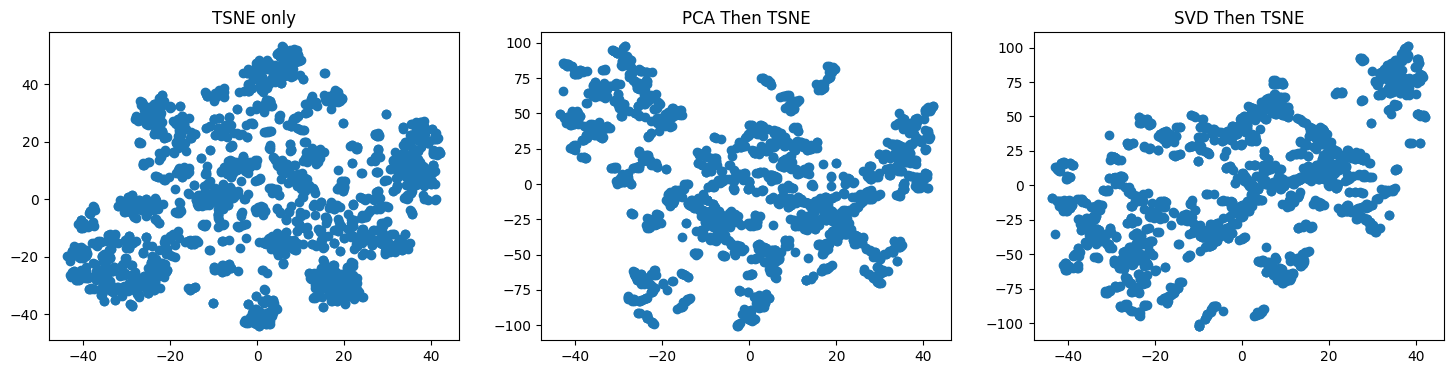

In [167]:
fig, ax = plt.subplots(1, 3, figsize=(18,4))

ax[0].scatter(x=prop_tsne[:, 0], y=prop_tsne[:, 1])
ax[0].set_title("TSNE only")

ax[1].scatter(x=prop_tsne[:, 0], y=prop_pca_tsne[:, 1])
ax[1].set_title("PCA Then TSNE")

ax[2].scatter(x=prop_tsne[:, 0], y=prop_svd_tsne[:, 1])
ax[2].set_title("SVD Then TSNE")

In [168]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [197]:
k = 20
model = GaussianMixture(k) # KMeans(k)

model.fit(prop_tsne)

clusters = model.predict(prop_tsne)

Text(0.5, 1.0, 'TSNE only')

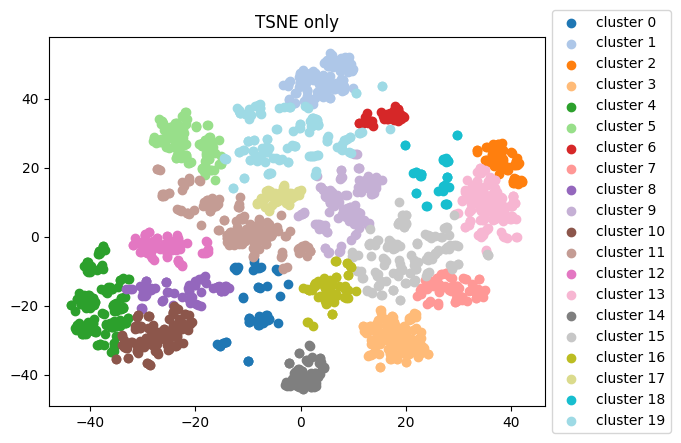

In [199]:
fig, ax = plt.subplots()

cmap = plt.colormaps.get("tab20")
colors = [cmap(i) for i in range(k)]

for i in range(k):
    ax.scatter(x=prop_tsne[clusters==i, 0], y=prop_tsne[clusters==i, 1], c=[colors[i]], label=f"cluster {i}")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("TSNE only")

In [273]:
dist_props[:2000].iloc[clusters==12].head(20)

,Property,Ref Code,Embedding
14,topology,1114,"[0.00863999966531992, 0.00532472925260663, -0...."
53,pore size,256,"[0.01622920110821724, 0.007310763001441956, 0...."
80,synthesis temperature,174,"[-0.013911960646510124, -0.005205788183957338,..."
101,unit cell dimensions a,141,"[0.0066070035099983215, 0.014118337072432041, ..."
127,synthesis yield,118,"[-0.010375593788921833, -0.021728500723838806,..."
128,magnetic susceptibility at 300 k,117,"[-0.01361521054059267, -0.0085103465244174, 0...."
216,co2/ch4 selectivity,68,"[0.011390225030481815, 0.002408150350674987, 0..."
251,unit cell parameter β,58,"[-0.01885814405977726, -0.0017987873870879412,..."
259,geometry,57,"[0.008493771776556969, 0.002396757248789072, 0..."
365,point symbol,37,"[-0.036507006734609604, -0.008050920441746712,..."


### Distribution of properties found after filtering and name standardization

### Application per MOF for Each Publisher

<Axes: xlabel='Publisher'>

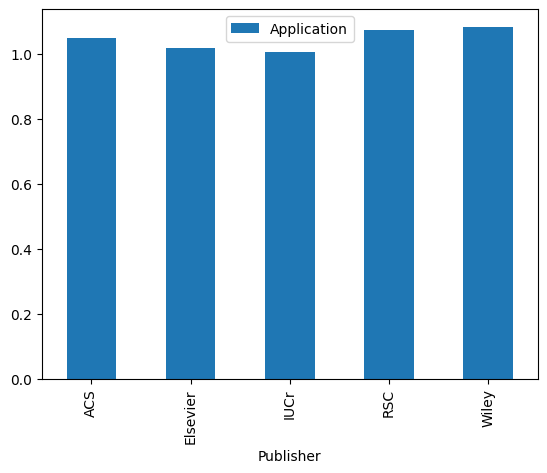

In [ ]:
appl_per_mof = appl_df[["Ref Code", "Application", "Publisher"]].groupby(["Ref Code", "Publisher"]).count().groupby("Publisher").mean()

appl_per_mof.plot(kind="bar")

## Examining Application Extraction

In [207]:
appl_df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,MOF Name,Ref Code,Application,Recommendation,Justification,Source
0,0,0.0,0,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Not Provided,Not Provided,Not Provided,10.1021/cg900515j
1,1,1.0,1,InEu(BTB)7/3(H2O)2·(DEF)6<|>SMOF-2<|>compound 1,KUNSUJ,Solid-state lighting (SSL) applications that a...,Investigated,Metal–organic frameworks are a class of materi...,10.1021/cm500700z
2,2,2.0,2,[AuS2PPh(OC5H9)]2<|>2,OGIJIX,Not Provided,Not Provided,Not Provided,10.1021/ic0201856
3,3,3.0,3,[Cd(μ-tp)(μ-bpp)(H2O)]·nnH2O<|>3,WOCKOP,Not Provided,Not Provided,Not Provided,10.1021/cg701232n
4,4,4.0,4,[CuBr2(L1)]·nn(MeOH)<|>complex 3,CURYAQ,Not Provided,Not Provided,The documents do not mention any specific appl...,10.1021/cg901327m


In [208]:
appl_df = appl_df.drop(["Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0"], axis = 1).merge(doi_pub_df, how='left', right_on="DOI", left_on="Source").drop("DOI", axis=1)

appl_df.head()

,MOF Name,Ref Code,Application,Recommendation,Justification,Source,Publisher
0,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Not Provided,Not Provided,Not Provided,10.1021/cg900515j,ACS
1,InEu(BTB)7/3(H2O)2·(DEF)6<|>SMOF-2<|>compound 1,KUNSUJ,Solid-state lighting (SSL) applications that a...,Investigated,Metal–organic frameworks are a class of materi...,10.1021/cm500700z,ACS
2,[AuS2PPh(OC5H9)]2<|>2,OGIJIX,Not Provided,Not Provided,Not Provided,10.1021/ic0201856,ACS
3,[Cd(μ-tp)(μ-bpp)(H2O)]·nnH2O<|>3,WOCKOP,Not Provided,Not Provided,Not Provided,10.1021/cg701232n,ACS
4,[CuBr2(L1)]·nn(MeOH)<|>complex 3,CURYAQ,Not Provided,Not Provided,The documents do not mention any specific appl...,10.1021/cg901327m,ACS


### Applications per MOF

In [209]:
appl_per_mof = appl_df[["Ref Code", "Application"]].groupby("Ref Code").count()
average_APM = appl_per_mof["Application"].mean()

print(f"Average properties per CSD Entry: {average_APM:.1f}")

Average properties per CSD Entry: 1.1


### Distribution of Applications Found

In [210]:
dist_appl = appl_df
dist_appl["Application"] = dist_appl["Application"].apply(lambda x: x.lower())
dist_appl = appl_df[["Ref Code", "Application"]].groupby("Application").count().sort_values("Ref Code", ascending=False)

dist_appl.reset_index(inplace=True)

dist_appl.head()

,Application,Ref Code
0,not provided,9557
1,hydrogen storage,294
2,luminescent materials,172
3,luminescence,139
4,co2 adsorption,115


Text(0.5, 1.0, 'Distribution of extracted properties')

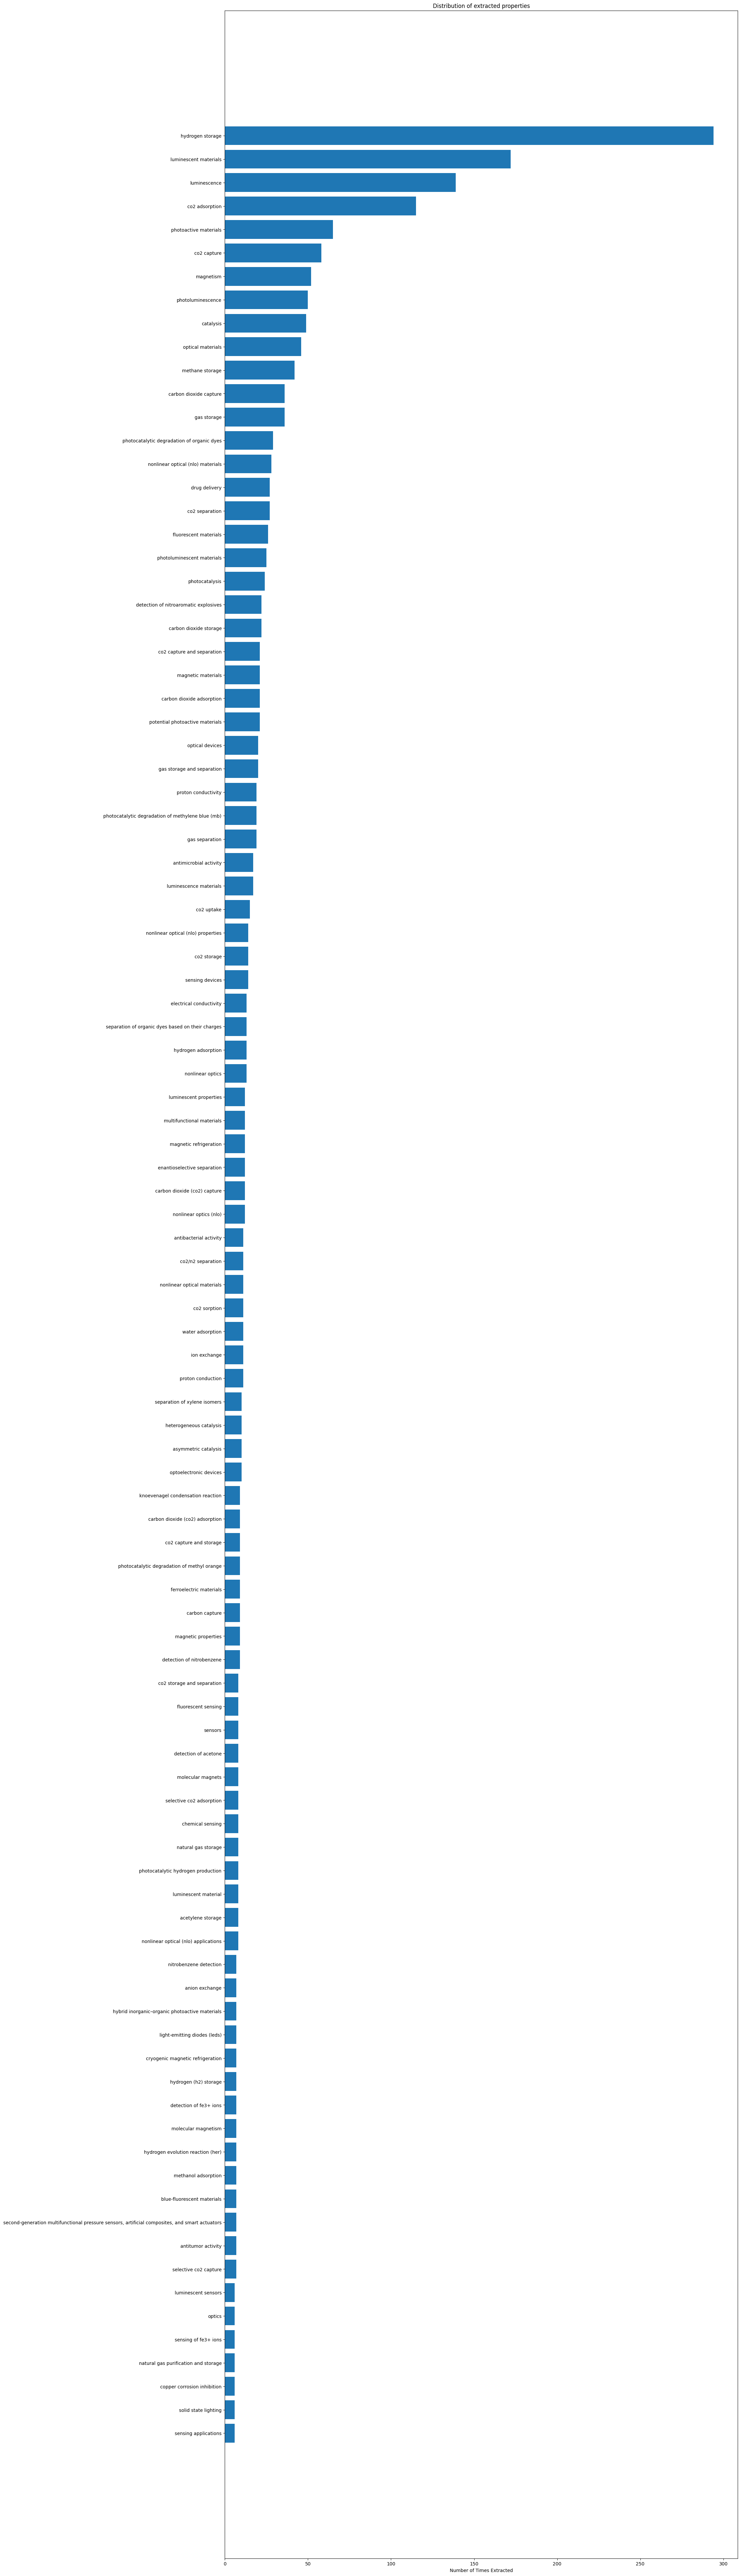

In [211]:
fig, ax = plt.subplots(figsize=(20, 100))

labels = list(dist_appl["Application"].iloc[1:100])
pos = np.arange(len(labels))

values = dist_appl["Ref Code"].iloc[1:100]

ax.barh(pos, values, align='center')
ax.set_yticks(pos, labels=labels)
ax.invert_yaxis()
ax.set_xlabel("Number of Times Extracted")
ax.set_title("Distribution of extracted properties")

### Applications After Filtering

### Applications Filtering Using Embeddings with text-ada-002

In [218]:
from openai import OpenAI
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

In [219]:
dist_appl["Embedding"] = pd.Series(np.zeros(len(dist_appl)))

dist_appl.head()

,Application,Ref Code,Embedding
0,not provided,9557,0.0
1,hydrogen storage,294,0.0
2,luminescent materials,172,0.0
3,luminescence,139,0.0
4,co2 adsorption,115,0.0


In [220]:
with open(".apikey", 'r') as f:
    client = OpenAI(api_key=f.read())

dist_appl["Embedding"][:2000] = dist_appl["Application"][:2000].apply(lambda x: 
                                                        client.embeddings.create(input=x.lower(),
                                                                                model="text-embedding-ada-002").data[0].embedding)

/tmp/ipykernel_36864/4096029544.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dist_appl["Embedding"][:2000] = dist_appl["Application"][:2000].apply(lambda x:
/tmp/ipykernel_36864/4096029544.py:4: SettingWithCopyWarning: 
A value is try

In [286]:
dist_props.to_csv("properties_embeddings_first_2000.csv")

In [221]:
appl_embeddings = np.array(list(dist_appl["Embedding"][:2000]))

Text(0.5, 1.0, 'TSNE only')

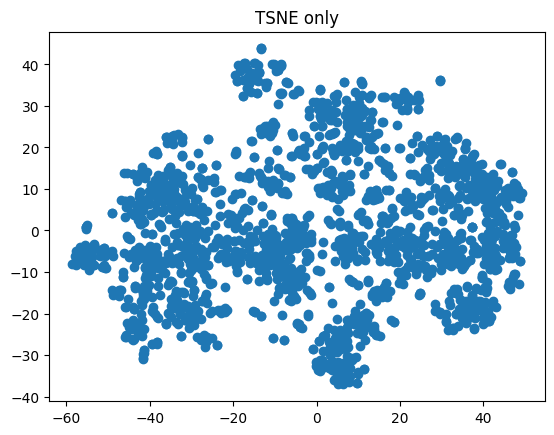

In [243]:
appl_tsne = TSNE(n_components=2, perplexity=50, learning_rate='auto', init='random')
appl_tsne = appl_tsne.fit_transform(appl_embeddings)

fig, ax = plt.subplots()

ax.scatter(x=appl_tsne[:, 0], y=appl_tsne[:, 1])
ax.set_title("TSNE only")

In [278]:
k = 20
model = GaussianMixture(k) # KMeans(k)

model.fit(prop_tsne)

clusters = model.predict(appl_tsne)

Text(0.5, 1.0, 'TSNE only')

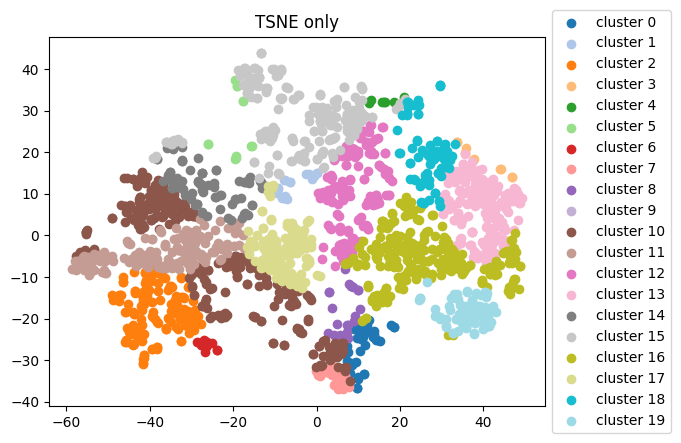

In [279]:
fig, ax = plt.subplots()

cmap = plt.colormaps.get("tab20")
colors = [cmap(i) for i in range(k)]

for i in range(k):
    ax.scatter(x=appl_tsne[clusters==i, 0], y=appl_tsne[clusters==i, 1], c=[colors[i]], label=f"cluster {i}")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("TSNE only")

In [284]:
dist_appl[:2000].iloc[clusters==15]

,Application,Ref Code,Embedding
0,not provided,9557,"[-0.023350298404693604, -0.014436210505664349,..."
9,catalysis,49,"[-0.022852880880236626, 0.0005799133214168251,..."
20,photocatalysis,24,"[-0.017616605386137962, 0.010143905878067017, ..."
59,knoevenagel condensation reaction,9,"[-0.016113320365548134, -0.007988267578184605,..."
75,photocatalytic hydrogen production,8,"[-0.010936281643807888, -1.9879929823218845e-0..."
...,...,...,...
1953,ce−mdip2,1,"[-0.03490802273154259, 0.0004939072532579303, ..."
1954,ch bond functionalization,1,"[-0.010377591475844383, 0.0005363999516703188,..."
1959,chemical fixation of co2 with epoxides to form...,1,"[-0.0010106157278642058, 0.010057352483272552,..."
1968,co2 cycloaddition reactions,1,"[-0.00958356074988842, -0.006922226864844561, ..."
